In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

## Having a Look at the data

salaries_df = pd.read_csv('ds_salaries.csv')
salaries_df.head()

In [100]:
salaries_df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [101]:
salaries_df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

In [102]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary_in_usd       2584 non-null   int64 
 5   employee_residence  2584 non-null   object
 6   remote_ratio        2584 non-null   int64 
 7   company_location    2584 non-null   object
 8   company_size        2584 non-null   object
dtypes: int64(3), object(6)
memory usage: 281.9+ KB


## Data Cleaning

In [103]:
salaries_df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [104]:
# Checking for duplicates
salaries_df.loc[salaries_df.duplicated()]

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size


In [105]:
# Removing duplicated rows from the dataset
salaries_df.loc[~salaries_df.duplicated(subset=['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'])]


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,US,100,US,L


In [106]:
# Dropping the salary and salary_currency columns since they have been summarized to the salary_in_usd
#salaries_df.drop(['salary', 'salary_currency'], axis=1)

Now that the data is clean now, We'll proceed to Exploratory Data Analysis to see how the data is
## Exploratory Data Analysis

In [107]:
salaries_df.head(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,US,0,US,M


In [108]:
salaries_df.describe()

,work_year,salary_in_usd,remote_ratio
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


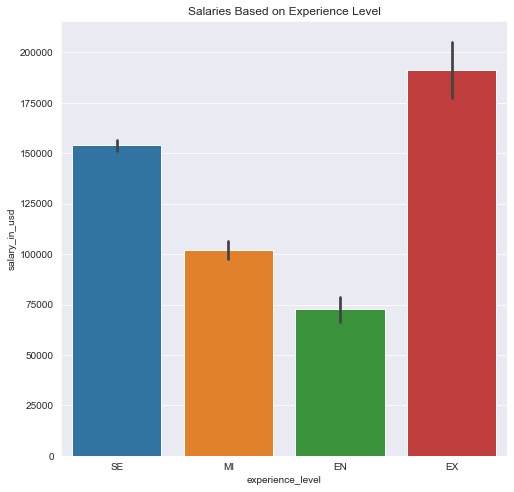

In [109]:
fig, ax = plt.subplots(figsize =(8,8))
sns.barplot(x = 'experience_level', y = 'salary_in_usd', data = salaries_df).set_title('Salaries Based on Experience Level')
plt.show()

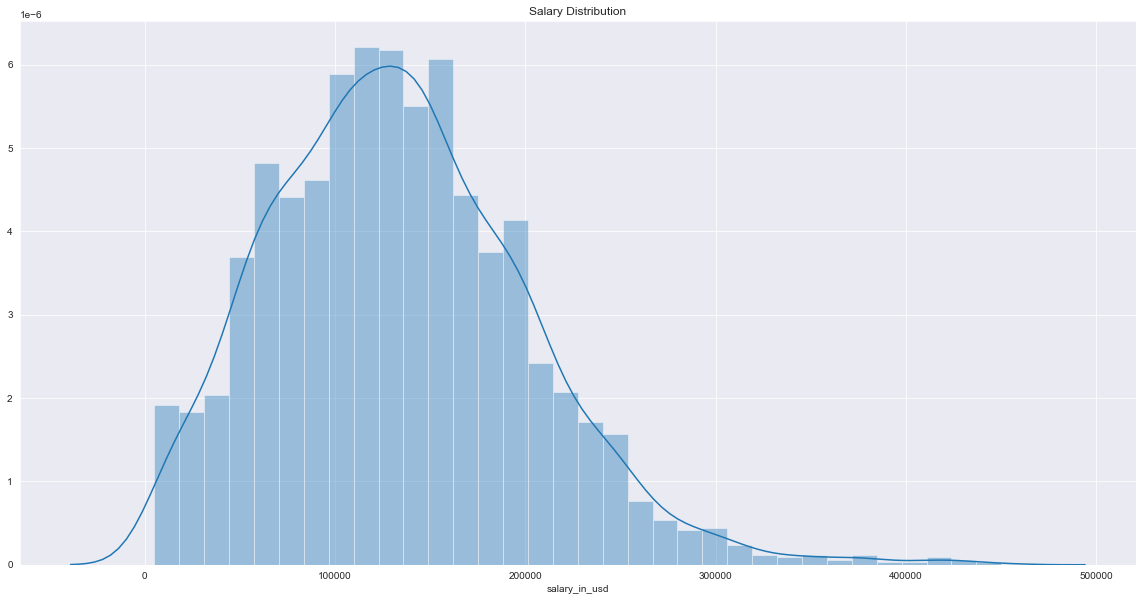

In [110]:
fig, ax = plt.subplots(figsize = (20, 10))
sns.distplot(salaries_df['salary_in_usd']).set_title('Salary Distribution')
plt.show()